**Task:1**


---

Here we need to load the house_price_data from a link which is in github. In the variable named url I have stored the link where the datas can be found. As you can see I have used "raw" in the link, The "raw" link on GitHub allows you to access the raw content of a file directly, without any additional HTML or formatting. When you use the "raw" link, you get the plain text content of the file. Then using the to_excel() method I have saved the file in excel and used index=false to avoid the default indexing from pandas.

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/kumudlakara/Medium-codes/main/linear_regression/house_price_data.txt"

data = pd.read_csv(url, header=None, names=["House Size", "Number of Bedrooms", "Price"])
data.to_excel("house_price_data.xlsx", index=False)
excel_data = pd.read_excel("house_price_data.xlsx")

print(excel_data)

    House Size  Number of Bedrooms   Price
0         2104                   3  399900
1         1600                   3  329900
2         2400                   3  369000
3         1416                   2  232000
4         3000                   4  539900
5         1985                   4  299900
6         1534                   3  314900
7         1427                   3  198999
8         1380                   3  212000
9         1494                   3  242500
10        1940                   4  239999
11        2000                   3  347000
12        1890                   3  329999
13        4478                   5  699900
14        1268                   3  259900
15        2300                   4  449900
16        1320                   2  299900
17        1236                   3  199900
18        2609                   4  499998
19        3031                   4  599000
20        1767                   3  252900
21        1888                   2  255000
22        1

**Task:2**

---

Here I have plotted House Size and Price in one graph using .scatter(). Scatter plots are used to visualize the relationship between two continuous variables. As I have plotted two different graphs I have used subplot method. Third parameter indicates index of the current subplot. 1 indicates the House Size vs Price and 2 indicates Number of Bedrooms vs Price graph.

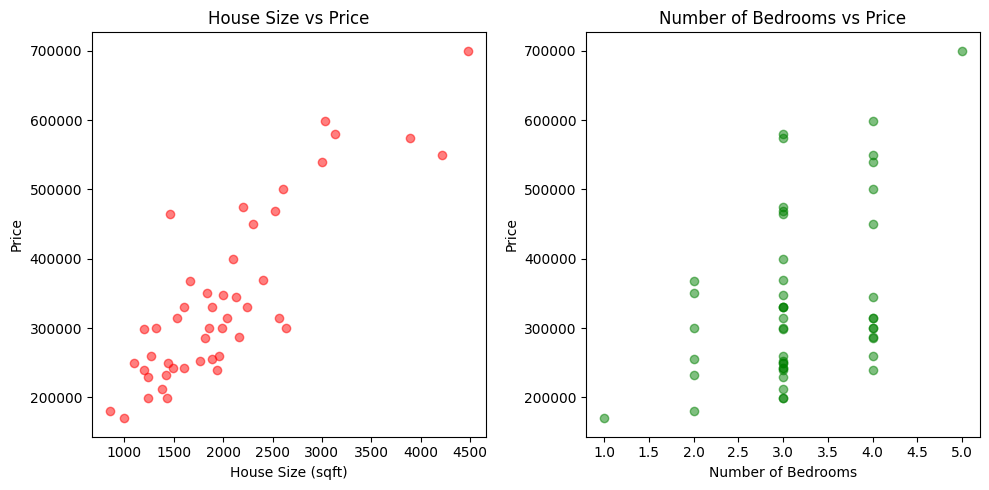

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['House Size'], data['Price'], color='red', alpha=0.5)
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.title('House Size vs Price')

plt.subplot(1, 2, 2)
plt.scatter(data['Number of Bedrooms'], data['Price'], color='green', alpha=0.5)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')

plt.tight_layout()
plt.show()


**Task:3**

---

Here I have used the .describe() method to show the statistical informations. Additionally I have used .var() for finding the variance.

In [ ]:
import pandas as pd
selected_data = data[['House Size', 'Number of Bedrooms']]

statistics = selected_data.describe()
variance = selected_data.var()
print(statistics)
print(variance)


        House Size  Number of Bedrooms
count    47.000000           47.000000
mean   2000.680851            3.170213
std     794.702354            0.760982
min     852.000000            1.000000
25%    1432.000000            3.000000
50%    1888.000000            3.000000
75%    2269.000000            4.000000
max    4478.000000            5.000000
House Size            631551.830712
Number of Bedrooms         0.579093
dtype: float64


**Task:4**

---
Here I have used Min-Max scaling for normalizing the feature set. MinMaxScaler is the tool used for scaling numerical data which will scale the data in a range of (0,1). .fit_transform() method will scale the data and returns a scaled version of the data. Then I have converted the scaled data into a dataframe using .DataFrame(). Finally I have concatenated the dataframe with the price values. As it is the target value we wont scale it.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

selected_data = data[['House Size', 'Number of Bedrooms']]

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(selected_data)

scaled_df = pd.DataFrame(scaled_data, columns=['Scaled House Size', 'Scaled Number of Bedrooms'])

scaled_data = pd.concat([scaled_df, data[['Price']]], axis=1)

print(scaled_data)



    Scaled House Size  Scaled Number of Bedrooms   Price
0            0.345284                       0.50  399900
1            0.206288                       0.50  329900
2            0.426917                       0.50  369000
3            0.155543                       0.25  232000
4            0.592388                       0.75  539900
5            0.312466                       0.75  299900
6            0.188086                       0.50  314900
7            0.158577                       0.50  198999
8            0.145615                       0.50  212000
9            0.177055                       0.50  242500
10           0.300055                       0.75  239999
11           0.316602                       0.50  347000
12           0.286266                       0.50  329999
13           1.000000                       1.00  699900
14           0.114727                       0.50  259900
15           0.399338                       0.75  449900
16           0.129068          

**Task:5**

---
Here train_test_split() method splits the data into training and testing sets.
*  Test_size=0.2 indicates that 20% of the data will be used for testing, and the remaining 80% for training.
*   random_state=42 sets a seed for the random number generator. This ensures that the data is split in the same way every time the code is run

Finally I have printed the dimensions.





In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_data[['Scaled House Size', 'Scaled Number of Bedrooms']]
y = scaled_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (37, 2)
X_test shape: (10, 2)
y_train shape: (37,)
y_test shape: (10,)


**Task:6**

---
The hypothesis function predicts the target variable (y) based on the input features (x) and a set of parameters (theta). Theta is an one dimensional array and x is a matrix where each row corresponds to a datapoint. The predicted value is determined by performing the dot product between the input features and the parameters.


In [ ]:
def hypothesis(theta, x):
    return np.dot(x, theta)

**Task:7**

---
Here m is the number of data points. Predicted value is determined by the hypothesis function. The cost calculated the Mean Squared Error (MSE) between the predicted values and the actual target values. The function returns the computed cost.


In [ ]:
import pandas as pd
import numpy as np

def cost_function(x, y, theta):
    m = len(y)
    #print(m)
    predicted_values = np.dot(x, theta)
    # print(predicted_values)
    cost = (1/(2*m)) * np.sum((predicted_values - y)**2)
    return cost

**Task-8**

---
In this function learning_rate determines the step size at which the algorithm descends along the gradient. The variable "gradient" calculates the gradient of the cost function with respect to the parameters. It involves a transpose operation to ensure the dimensions align correctly. Then I have calculated the cost function and appended the value at current epoch to the 'cost_history' list.


In [ ]:
def gradient_descent(x, y, theta, learning_rate, num_epochs):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):
        predictions = x.dot(theta) #hypothesis function

        errors = predictions - y #differences between the predicted values and the actual target values.

        gradient = (1 / m) * x.T.dot(errors)
        theta -= learning_rate * gradient #updates the parameters (theta) using the gradient descent update rule.

        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history


**Task:9**

---
Here x = np.c_[np.ones(x.shape[0]), x] adds a column of ones to the feature matrix x. This is necessary for including the intercept term in the linear regression model. Then I have initialized the parameters (theta) with zeros. I have reduced the learning in order to make the algortihm more stable. Then I have optimized theta by applying gradient descent. Finally I have calculated the final cost using optimized parameters.


In [ ]:
x = data[['House Size', 'Number of Bedrooms']]
y = data['Price']
x = np.c_[np.ones(x.shape[0]), x]
theta = np.zeros(x.shape[1])
learning_rate = 0.00000001
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
# print(theta)
J = cost_function(x, y, theta)
print("Cost:", J)
print("Parameters (theta):", theta)

Cost: 2955070966.041896
Parameters (theta): [6.96485826e-02 1.49853133e+02 2.24735775e-01]


**Task:10**

---
Firslty I have extracted the House size and number of bedrooms from the dataset. Then I calculated the predicted prices using hypothesis function. I have used .scatter() method for creating a scatter plot for the actual data points. Finally I have plotted the best fitted line using .plot() method. What we can notice here is the more we reduce the learning rate we get a more precised best fitted line.


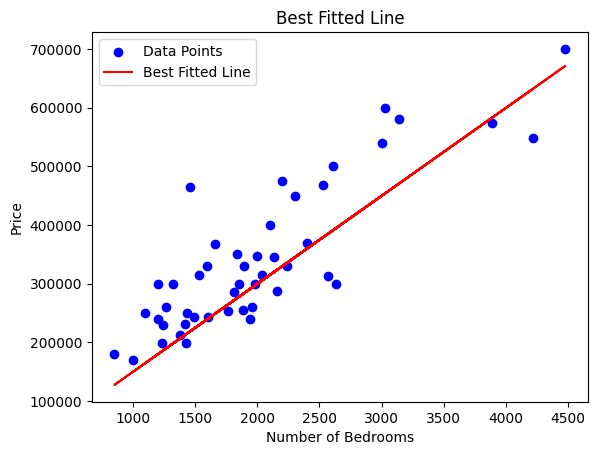

In [ ]:
import matplotlib.pyplot as plt
house_sizes = data['House Size']
num_bedrooms = data['Number of Bedrooms']
predicted_prices = hypothesis(theta, x)
plt.scatter(house_sizes, y, color='blue', label='Data Points')
plt.plot(house_sizes, predicted_prices, color='red', label='Best Fitted Line')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Best Fitted Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Best Fitted Line')
plt.legend()
plt.show()

**Task:11**

---
"epochs" are a list of numbers from 1 to the length of J_all. This will represent the x-values (epochs) for the plot. Then I have created a line plot of the cost function values (J_all) against the epochs.
The graph shows that we are minimizing the error in every iteration.

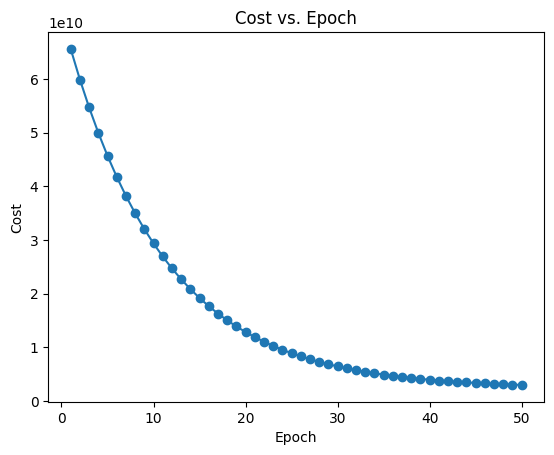

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(J_all) + 1)

plt.plot(epochs, J_all, marker='o')

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.show()


**Task:12**


---
After selecting the features and traget variable I split the data into training and testing set. .fit() method trains the linear regression model using the training data. .predict() method uses the trained model to make predictions on the test data. Finally I have calculted MSE.
For better understanding I have also plotted the actual prices and predicted prices against 'House Size'.

Coefficients (theta values): [ 84763.62252219    143.21853204 -13512.56442597]
Mean Squared Error: 8610424544.777676


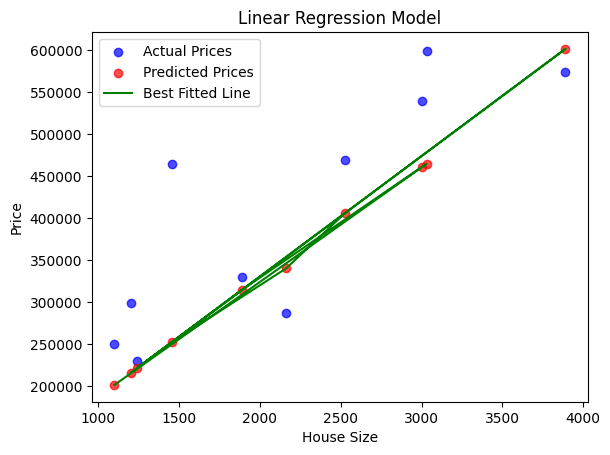

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
X = data[['House Size', 'Number of Bedrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() #creating an instance of the linear regression model

model.fit(X_train, y_train)

theta = np.append(model.intercept_, model.coef_) #combining the intercept and coefficients (parameters) of the model into a single array

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Coefficients (theta values):", theta)
print("Mean Squared Error:", mse)

plt.scatter(X_test['House Size'], y_test, color='blue', label='Actual Prices', alpha=0.7)
plt.scatter(X_test['House Size'], y_pred, color='red', label='Predicted Prices', alpha=0.7)
plt.plot(X_test['House Size'], y_pred, color='green', label='Best Fitted Line')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('Linear Regression Model')


plt.legend()

plt.show()
